# Machine Learning for Data Science - Computer Labs 2024-2025

Professor: Francois PORTIER
Student: Ba-Khuong DANG


In [1]:
# Loading packages
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Exercise 1

**Simulation set up**

I will illustrat the blessing of independence with regard to the variance of the mean of sequence of random variables. 

Let $Z$ be a random variable and $Z_i$ is the sequence of realized value of $Z$, with $i\leq1$.

Sample mean of $Z$ is given by: $n^{-1}\sum_{i=1}^n{Z_i}$

The variance of empirical mean will have variance equal to: 

$$\mathbb{E}\left[\left(n^{-1} \sum_{i=1}^n Z_i - \mathbb{E}[Z]\right)^2\right] = \frac{\text{Var}(Z)}{n}=\|\hat{\mu}-\mu\|$$

This represent the L2 distance between the expected value (true value) and the empirical mean value of $\Z$. 
- One advantage of this theorem is that it is always true and does not depend on value of $n$ (sample size), which makes it a reliable measurement. 
- The disadvantage of this is that it only shows 1 moment of random variable, which cannot be used to fully characterize $\Z$ 

**Python implement**

I will use `numpy` random generator to generate a sequence of random variable - with predefined mean and variance. 

To calculate the expected value of $\mathbb{E}\|\hat{\mu}-\mu\|$, I will use Monte Carlo simulation with large random sampling to estimate the results. Notice that since $Z_i$ is a random variable, $\hat{\mu}$ is also a random variable so we can apply this technique to approximate expected value of $\mathbb{E}[\hat{\mu}]$

Additionally, to highlight the independence property, I will simulate the results using different probability distributions and varying sample sizes of $Z$.


In [104]:
# Loading packages
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(2796)


# Function for generate Normal Distribution
def z_norm(mu, sigma, n):
    """
    Generate sequence of rv with Normal distribution
    Returns:
        L2 norm distance with the true mean
    """
    Z = np.random.normal(mu, sigma, n)
    return (np.mean(Z) - mu) ** 2


# Function for generate Exponential Distribution
def z_exp(scale, n):
    """
    Generate sequence of rv with Exponential distribution
    Returns:
        L2 norm distance with the true mean
    """
    Z = np.random.exponential(scale, n)
    return (np.mean(Z) - scale) ** 2


# Function to calculate Expected value of variance
def simulation(nb_simu, dist="norm", *para):
    """
    Monte-Carlo simulation to calculate E[mu_hat - mu]
    Returns:
        Expected value for L2_norm
    """
    if dist == "norm":
        result = np.array([z_norm(*para) for _ in range(nb_simu)])
    elif dist == "exp":
        result = np.array([z_exp(*para) for _ in range(nb_simu)])

    return np.mean(result)


# Define model parameters
mu_range = np.random.randint(0, 5, 10)  # Param for Normal ditribution
sigma_range = np.random.randint(1, 10, 10)  # Param for Normal distribution
scale_range = np.random.randint(1, 5, 10)  # Param for Exponential distribution
n_range = np.arange(50, 100, 10)  # Sample size
nb_simu = 5_000  # Number of MonteCarlo simulation


# Compute Expectation of L2 norm for each set of parameters
# Normal distribution sample
E_l2_norm = np.array(
    [
        simulation(nb_simu, "norm", mu, sigma, n)
        for mu, sigma, n in zip(mu_range, sigma_range, n_range)
    ]
)
var_n_norm = np.array(
    [sigma**2 / n for mu, sigma, n in zip(mu_range, sigma_range, n_range)]
)

# Normal distribution sample
E_l2_exp = np.array(
    [simulation(nb_simu, "exp", scale, n) for scale, n in zip(scale_range, n_range)]
)
var_n_exp = np.array([scale**2 / n for scale, n in zip(scale_range, n_range)])

In [ ]:
# Plot the result
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    E_l2_norm, var_n_norm, s=25, c="blue", alpha=0.6, label="Normal Distribution"
)  # Plot for normal distribution
ax.scatter(
    E_l2_exp, var_n_exp, s=25, c="red", alpha=0.6, label="Exponential Distribution"
)  # Plot for exponential distribution
ax.axline((0, 0), slope=1, c="green", linestyle="--", alpha=0.6, label="y=x")
ax.set_xlabel(
    r"$E\left[\left(n^{-1}\sum_{i=1}^{n} Z_i - E\left[Z\right]\right)^2\right]$",
    fontsize=12,
)
ax.set_ylabel(r"$\frac{\text{var}(Z)}{n}$", fontsize=14)
ax.set_title("Variance of sample mean")
ax.legend()
plt.show()

## Exercise 2

**Simulation set up** 

I will simulate the effect of **central limit theorem (CLT)** for sequence of random variable, using the same set up sequence as in exercise 1:

- $Z$ is a random variable and $Z_i$ is the sequence of realized value of $Z$, with $i\leq1$.
- Empirical mean of $Z$ is: $n^{-1}\sum_{i=1}^n{Z_i}$

Central Limit Theorem states than with large number of sample $(n\to\infty)$, the distribution of empirical sample mean will converge to a normal distribution with mean equals true mean $(\mathbb{E}[Z])$. Mathematically, we can express:

$$\sqrt{n}(\left(n^{-1} \sum_{i=1}^n Z_i - \mathbb{E}[Z]\right)) \to \mathcal{N}(0, \text{Var}(Z))$$

Unlike the $L_2$ error, CLT only holds for large sample size. The advantage of this theorem is that it fully characterize the distribution. Also, CLT holds for any type of distribution of random variable $Z$

**Python implementation**

Similar to exercise 1, I will implement this theorem using `numpy` random generator, and I use Monte-Carlo simulation method to generate and plot the distribution of $Z$. 

In [ ]:
np.random.seed(2796)


# Function for generate Normal Distribution
def z_norm(mu, sigma, n):
    """
    Generate sequence of rv with Normal distribution
    Returns:
        Sequence of normal random variable and its pdf
    """
    # x = np.linspace(mu - 4*sigma, mu + 4*sigma, n)  # Range for x values
    x = np.random.normal(mu, sigma, n)
    x = np.sort(x)
    y = norm.pdf(x, mu, sigma)  # pdf of x
    return x, y


# Function to generate Binomial Distribution
def z_binom(trial, p, n):
    """
    Generate sequence of rv with Binomial distribution
    Returns:
        Sample mean that is centered.
    """
    Z = np.random.binomial(trial, p, n)
    return (np.mean(Z) - trial * p) * np.sqrt(n)


# Set up parametes
nb_simu = 1_000  # Number of simulation
trial, p, n = 10, 0.5, 500
mu = 0
sigma = (trial * p) * (1 - p)

# Generate Normal Distribution for comparison
x_norm, y_norm = z_norm(0, np.sqrt(sigma), 1000)

# Set up subplot grid (2x2) for each value of n
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for idx, n in enumerate([5, 50, 100, 250]):
    rv_simu = np.array([z_binom(trial, p, n) for i in range(nb_simu)])
    # Plot Z distribution and Normal distribution
    axs[idx].hist(
        rv_simu,
        bins=30,
        density=True,
        color="blue",
        edgecolor="blue",
        alpha=0.5,
        label=f"Sample mean with n={n}",
    )
    axs[idx].plot(x_norm, y_norm, color="red", label="Normal Distribution")
    axs[idx].legend(loc="upper left")

plt.tight_layout()
plt.show()

We observe that as the sample size $n$ increases, the distribution of the sample mean $\hat{\mu}$ approaches a normal distribution, regardless of the original distribution of $Z$

## Exercise 3

**Simulation set up** 

I will generate a simulate data for a multinomial logistic regression model. Our model will have 8 predictors $(p = 8)$ and the depedent variable will have 2 categories $( 0 or 1)$. 

- $X$ is a random vector in $\R^8$ that follows a Gaussian distribution $X \sim \mathcal{N}(0, I_p) with $\I_p$ is identity matrix. That means our predictors are i.i.d with mean $0$

- $Y$ follows a Bernoulli distribution with pdf:
$$Y \sim \mathcal{B}(p(X))$$

- The parameter $p$ (the probabily of $Y = 1$) is defined by function of $x_i$:  
$$p(x) = \frac{\exp(x_1 + x_2^2 )}{1 + \exp(x1 + x_2^2 )}$$

- Our sample size is $n = 3000$.

**Python Implementation**

In [1]:
# Prequisition

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate multivariate random variable X ~ N(0, I_p)
def generate_data(seed, n, p):
    """
    Generate random data
    Returns:
    X: (n, p) multinormial rv with n observations and p features
    Y: (n, ) binomial rv
    """
    mean = np.zeros(p)
    cov = np.identity(p)

    if seed: 
        np.random.seed(seed)  # set seed for reproducibitity
    X = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

    # Compute sigmoid function of X p(x) = exp(x1 + x2^2) / (1 + exp(x1 + x2^2))
    x1 = X[:, 0]
    x2 = X[:, 1]
    p_x = np.exp(x1 + x2**2) / (1 + np.exp(x1 + x2**2))

    # Generate Y ~ Bernoulli(p(x))
    Y = np.random.binomial(n=1, p=p_x)

    return X, Y

# Parameters
p = 8  # dimension of the Gaussian vector
n = 3_000  # number of samples

X, Y = generate_data(seed=2796, n=3000, p=8)

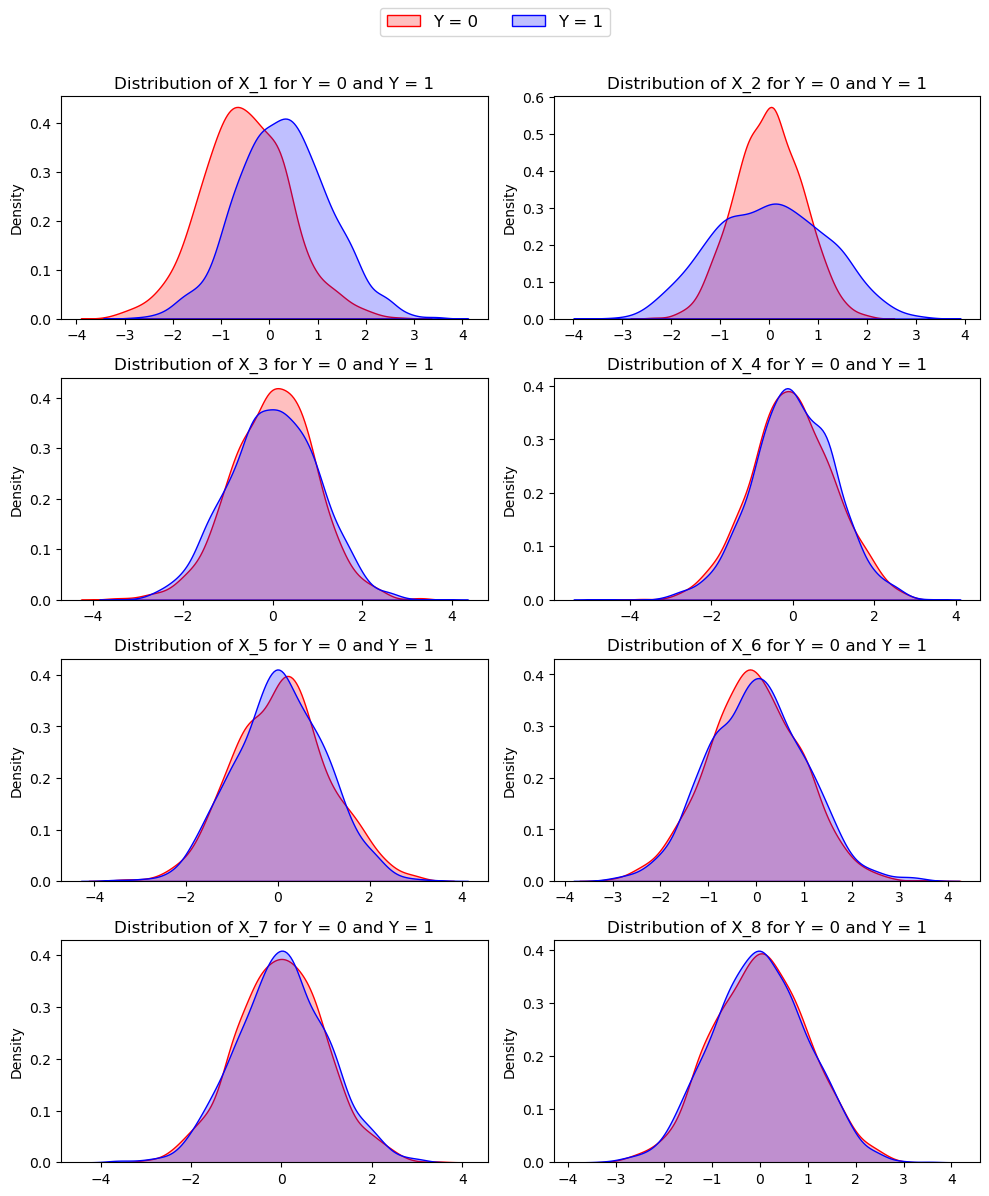

In [2]:
# Plot the density of x_i against Y
N, p = X.shape

fig, ax = plt.subplots(4, 2, figsize=(10, 12))
ax = ax.flatten()

for i in range(X.shape[1]):
    x_i = X[:, i]

    sns.kdeplot(x_i[Y == 0], ax=ax[i], color="red", fill=True, label="Y = 0")
    sns.kdeplot(x_i[Y == 1], ax=ax[i], color="blue", fill=True, label="Y = 1")

    ax[i].set_title(f"Distribution of X_{i+1} for Y = 0 and Y = 1")

# Show the plot
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Exercise 4

In this exercise, I will implement Gradient Descent (GD) and Stochastic Gradient Descent (SGD) algorithm for optimization problem. 

Our goal is to find the logistic regression estimator, defined as Empirical risk minimizer for risk function: 

$$
\beta_n \in \arg \min_{\beta \in \mathbb{R}^{p+1}} \left( -\sum_{i=1}^{n} \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right) \right)
$$

with sigmoid function is:

$$
q_{\beta}(x) = \frac{\exp(\beta_0 + \beta^T x)}{1 + \exp(\beta_0 + \beta^T x)}
$$

### Calculate the Gradient of Risk function

First we need to calculate the Gradient of the risk function $\hat{R}_{(\beta)}$ with respect to $\beta$. We will use the average of risk function to have something more like a probability distribution. 

Our objective function is:

$$
\beta_n \in \arg \min_{\beta \in \mathbb{R}^{p+1}} \left( - \frac{1}{n} \sum_{i=1}^{n} \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right) \right)
$$

Notice that we have $\beta \in \mathbb{R}^{9}$ because we include the intercept $\beta_0$ in our calculation for convenience. For this reason, we will include a column of $1$ in our original $X$ matrix. 

$$
Z := 
\begin{bmatrix}
1 & x_1^T \\
1 & x_2^T \\
... & ... \\
1 & x_n^T
\end{bmatrix}
$$

**Math derivation**

The mathematical derivation we calculated during our class is as follows:
$$
\nabla_b \hat{R}_{(\beta)} = \sum_{i=1}^{n} \left( z_i \left(Y_i - \frac{\exp(\beta^Tz_i)}{1 + \exp(\beta^Tz_i)} \right)\right)
$$


### Gradient Descent

**Update rule**

For Gradient Descent, at each point of beta that we visit, we will calculate the gradient of the whole data set. 

Our update rule for $\beta_i$ is: 

**Python implementation**

In [92]:
def sigmoid(Z, beta):
    """
    Calcuate the sigmoid function at a point Z_i, Y_i
    Returns:
    sigmoid: array(n, 1) - predict probability y_hat
    """

    logit = Z.dot(beta)

    # Control logit to avoid overflow in exp function
    # logit = np.clip(logit, -100, 100)

    sigmoid_ = np.exp(logit) / (1 + np.exp(logit))

    # Set up small epsilon to avoid log(0) = -inf
    # epsilon = 1e-10
    # sigmoid_ = np.clip(sigmoid_, epsilon, 1 - epsilon)

    return sigmoid_


def risk_beta(Z, Y, beta):
    """
    Calcuate the empirical risk at a point Z_1, Y_1
    Returns:
    risk_beta: scalar - risk valuated at current beta value.
    """

    Yhat = sigmoid(Z, beta)

    risk_beta = -(
        Y.T.dot(np.log(Yhat)) + (1 - Y).T.dot(np.log(1 - Yhat))
    )  # / Y.shape[0]
    return risk_beta


def gradient(Z, Y, Yhat):
    """
    Calcuate the gradient of loss function at a point/row
    Returns:
    grad_: array(p, 1) gradient of funtion valuated at current beta value.
    """
    grad_ = -Z.T.dot((Y - Yhat)) / Z.shape[0]
    return grad_


def gradient_descent(X, Y, beta, iters):
    """
    Gradient Descent algorithm
    Returns:
    beta: array(p, 1) - logistic regression minimizer estimator
    log_risk: a list of log loss at each step.
    """

    N, p = X.shape  # Size of sample X
    # Add column=1 to X for intercept
    ones_column = np.ones((N, 1))
    Z = np.hstack((ones_column, X))

    # Check dimension of Y to reshape array(n,) to array(n, 1)
    # if Y.ndim < 2:
    #     Y = Y.reshape(-1, 1)

    # Initialize dict to store parameters
    hist = {}
    hist["beta"] = [beta.copy()]  # list to store beta value at each iteration
    hist["risk"] = [risk_beta(Z, Y, beta)]  # list to store risk value
    hist["gradient"] = []

    # Execute loops
    for iter in range(iters):

        # calculate sigmoid fuction at current beta value
        Yhat = sigmoid(Z, beta)

        # learning rate
        lr = 1 / (iter + 1)

        # calculate gradient at current value
        dbeta = gradient(Z, Y, Yhat)

        # Update value of beta
        beta = beta - lr * dbeta

        # calculate risk at current beta value
        risk = risk_beta(Z, Y, beta)

        # Store values  of current iteration
        hist["beta"].append(beta.copy())
        hist["risk"].append(risk.copy())
        hist["gradient"].append(dbeta)

    return beta, hist

### Stochastic Gradient Descent (SGD)

In [94]:
def stochastic_gradient_descent(X, Y, beta, batch_size=10, iters=10):
    """
    Stochastic Gradient Descent algorithm
    Returns:
    beta: array(p, 1) - logistic regression minimizer estimator
    hist: a list of beta at each step.
    """
    
    N, p = X.shape  # Size of sample X

    # Add column=1 to X for intercept
    ones_column = np.ones((N, 1))
    Z = np.hstack((ones_column, X))
    # ZY = np.c_[Z, Y.reshape(N, 1)]

    # Initialize dict to store parameters
    hist = {}
    hist["beta"] = [beta.copy()]  # list to store beta value at each iteration
    hist["risk"] = [risk_beta(Z, Y, beta)]  # list to store risk value
    hist["gradient"] = []

    # Main loops
    for iter in range(iters):

        # Shuffle data at the start of each iteration
        # take a random batch of size batch_size
        indices = np.random.choice(N, size=batch_size)
        Z_batch = Z[indices]
        Y_batch = Y[indices]

        # calculate sigmoid fuction at current beta value
        Yhat = sigmoid(Z_batch, beta)

        # learning rate
        lr = 1 / (iter + 1)

        # calculate gradient at current value
        dbeta = gradient(Z_batch, Y_batch, Yhat)

        # Update value of beta
        beta = beta - lr * dbeta

        # calculate risk at current beta value
        risk = risk_beta(Z, Y, beta)

        # Store values  of current iteration
        hist["beta"].append(beta.copy())
        hist["risk"].append(risk.copy())
        hist["gradient"].append(dbeta)

    return beta, hist

### Train our model

We will use function `generate_data` from [Exercise 3](#exercise-3) to generate our test data X and Y. 

In [95]:
# Generate train data
X_train, Y_train = generate_data(seed=2796, n=3000, p=8)

# Initialize parameters
iter_gd = 100
batch_size = 30
iter_sgd = X_train.shape[0] * iter_gd / batch_size
beta_init = np.zeros(X_train.shape[1] + 1)

# Use Gradient Descent method
beta_gd, hist_gd = gradient_descent(X=X_train, Y=Y_train, beta=beta_init, iters=int(iter_gd))

# Use Stochastic Gradient Descent method
beta_sgd, hist_sgd = stochastic_gradient_descent(X=X_train, Y=Y_train, beta=beta_init, batch_size=batch_size, iters=int(iter_sgd))

In [96]:
def print_beta(beta):
    # Function to print beta coefficient

    print('---Final optimized beta--- \n')
    print(f'{"Intercept":<15} {beta[0]:>10.6f}')
    print("Coefficient:")
    for i, beta in enumerate(beta[1:]):
        # This is to seperate beta and gamma coeff when we increase the degree of our model
        if i <= 7:
            print(f'beta_{i+1:<10} {beta:>10.6f} [x{i+1}]')
        else: 
            print(f'gamma_{i-7:<9} {beta:>10.6f} [x{i-7}^2]')


print('==== Gradient Descent ====')
print_beta(beta_gd)
print()
print('==== Stochastic Gradient Descent ====')
print_beta(beta_sgd)

==== Gradient Descent ====
---Final optimized beta--- 

Intercept         0.444339
Coefficient:
beta_1            0.549949 [x1]
beta_2            0.015497 [x2]
beta_3           -0.006715 [x3]
beta_4            0.024663 [x4]
beta_5           -0.010709 [x5]
beta_6            0.034528 [x6]
beta_7            0.018587 [x7]
beta_8           -0.004301 [x8]

==== Stochastic Gradient Descent ====
---Final optimized beta--- 

Intercept         0.603856
Coefficient:
beta_1            0.697680 [x1]
beta_2            0.009452 [x2]
beta_3           -0.016956 [x3]
beta_4            0.015118 [x4]
beta_5           -0.025491 [x5]
beta_6            0.065026 [x6]
beta_7           -0.007553 [x7]
beta_8           -0.015608 [x8]


We can visualize the descent of log-loss function over our iteration. We notice that during first 6-7 iteration, the loss function decreases more rapidly, then it slows down. This is because we use a decay learning rate, so the adjustment we apply to $\beta$ will be smaller after each iteration. This helps use avoid situation in which we jump pass the minimal point of function. 

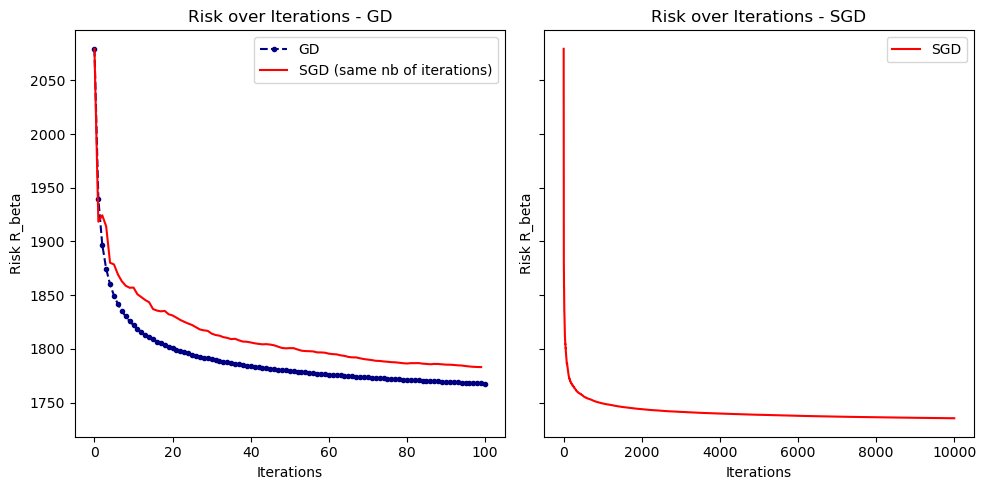

In [76]:
# Plot the loss over iterations
# hist_risk_gd = risk_beta_hist(X_train, Y_train, hist_gd["beta"])
# hist_risk_sgd = risk_beta_hist(X_train, Y_train, hist_sgd["beta"])

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot the risk for Gradient Descent
ax[0].plot(hist_gd["risk"], "o--", color="navy", markersize=3, label="GD")
ax[0].plot(hist_sgd["risk"][:iter_gd], "-", color="r", label="SGD (same nb of iterations)")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Risk R_beta")
ax[0].set_title("Risk over Iterations - GD")
ax[0].legend()

# Plot the risk for Stochastic Gradient Descent
ax[1].plot(hist_sgd["risk"], "-", color="r", label="SGD")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Risk R_beta")
ax[1].set_title("Risk over Iterations - SGD")
ax[1].legend()

plt.tight_layout()
plt.show()

We can also visualize the trajectory of loss function using a contour plot. Since we have $p=8$ features, our parameter space is $\beta \in R^8$, we will only choose a $R^2$ space to project our function. We will shows contour plot in parameter space of 2 highest parameter values, which are $b_0$ and $b_1$.

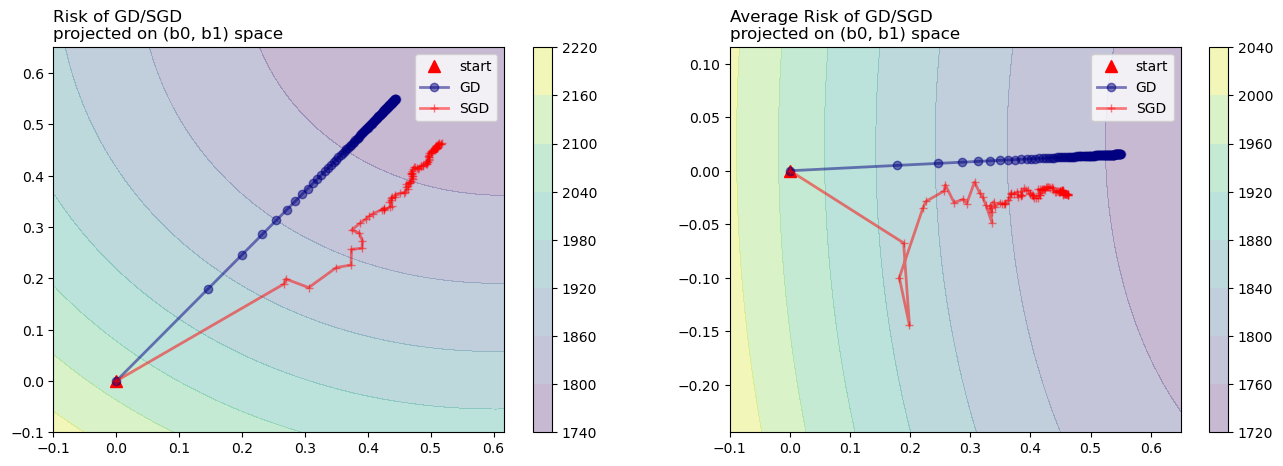

In [77]:
def plot_risk_contour(ax, X, Y, beta, hist_gd, hist_sgd, b1_index, b2_index):
    """
    Calculate risk w.r.t to b_0 and b_1
    Keeping all other coefficient fix with optimized value.
    """
    N = X.shape[0]
    Z = np.hstack((np.ones((N, 1)), X))
    nb_iter = len(hist_gd["beta"])  # take the number of iteration of GD

    bgd = np.asarray(hist_gd["beta"])
    bsgd = np.asarray(hist_sgd["beta"][:nb_iter])

    # define a range of value for axis
    min_beta1 = min(bgd[:, b1_index].min(), bsgd[:, b1_index].min())
    max_beta1 = max(bgd[:, b1_index].max(), bsgd[:, b1_index].max())
    min_beta2 = min(bgd[:, b2_index].min(), bsgd[:, b2_index].min())
    max_beta2 = max(bgd[:, b2_index].max(), bsgd[:, b2_index].max())

    range_b1 = np.linspace(min_beta1 - 0.1, max_beta1 + 0.1, 50)
    range_b2 = np.linspace(min_beta2 - 0.1, max_beta2 + 0.1, 50)

    B1, B2 = np.meshgrid(range_b1, range_b2)

    # calculate grid of value for each value beta1, beta2
    R = []
    for b1, b2 in zip(np.ravel(B1), np.ravel(B2)):
        beta[b1_index] = b1
        beta[b2_index] = b2
        R.append(risk_beta(Z, Y, beta))
    R = np.array(R).reshape(B1.shape)

    CS = ax.contourf(B1, B2, R, cmap="viridis", alpha=0.3)  # contour space
    plt.colorbar(CS, ax=ax)

    return ax


def plot_risk_trajectory(ax, hist_gd, hist_sgd, b1_index, b2_index):

    nb_iter = len(hist_gd["beta"])
    bgd = np.asarray(hist_gd["beta"])
    bsgd = np.asarray(hist_sgd["beta"][:nb_iter])

    # Plot starting point
    ax.plot(
        bgd[:, b1_index][0],
        bgd[:, b2_index][0],
        "^",
        label="start",
        color="red",
        markersize=8,
    )

    # beta trajectory of GD
    ax.plot(
        bgd[:, b1_index],
        bgd[:, b2_index],
        "o-",
        lw=2,
        alpha=0.5,
        color="navy",
        label="GD",
    )

    # beta trajectory of SGD
    ax.plot(
        bsgd[:, b1_index],
        bsgd[:, b2_index],
        "+-",
        lw=2,
        alpha=0.5,
        color="red",
        label="SGD",
    )

    ax.legend()
    ax.set_title("Risk of GD/SGD\nprojected on (b0, b1) space", loc="left")

    return ax


fig, ax = plt.subplots(1, 2, figsize=(16, 5))
plot_risk_contour(ax[0], X, Y, beta_sgd, hist_gd, hist_sgd, 0, 1)
plot_risk_trajectory(ax[0], hist_gd, hist_sgd, 0, 1)
plot_risk_contour(ax[1], X, Y, beta_sgd, hist_gd, hist_sgd, 1, 2)
plot_risk_trajectory(ax[1], hist_gd, hist_sgd, 1, 2)


plt.legend()
plt.title("Average Risk of GD/SGD\nprojected on (b0, b1) space", loc="left")
plt.show()

Randomness of GD and SGD

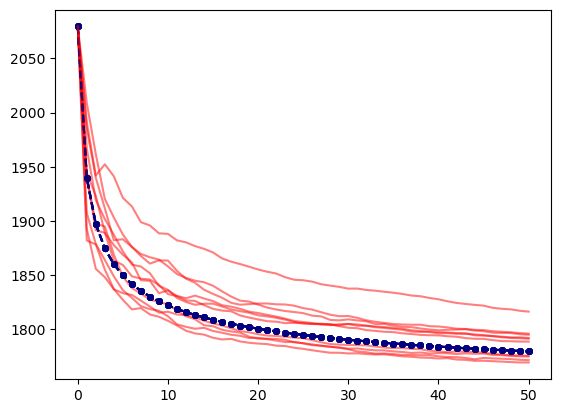

In [78]:
nb_simu = 10
simu_gd = []
simu_sgd = []

fig, ax = plt.subplots()

for i in range(nb_simu):
    _, simu_hist_gd = gradient_descent(X=X_train, Y=Y_train, beta=beta_init, iters=50)
    simu_gd.append(simu_hist_gd["risk"])
    ax.plot(simu_hist_gd["risk"], "o--", color="navy", alpha=0.5, markersize=4, label="GD")

    _, simu_hist_sgd = stochastic_gradient_descent(X=X_train, Y=Y_train, beta=beta_init, batch_size=batch_size, iters=50)
    simu_sgd.append(simu_hist_sgd["risk"])
    ax.plot(simu_hist_sgd["risk"], "-", color="r", alpha=0.5, label="SGD")
    
    # plot_risk_trajectory(ax[1], simu_hist_gd, simu_hist_sgd, 0, 1)

 
# plot_risk_contour(ax[1], X_train, Y_train, beta_sgd, hist_gd, hist_sgd, 0, 1)
plt.legend().set_visible(False)
plt.show()

## Exercise 5

Now we will use our previous trained model to predict value of Y on a new test database. We will use misclassification rate as our model evaluation metric. The misclassification rate is defined as: 

$$
Misc = \hat{R_n}(\beta) = \frac{1}{n} \sum(\mathbb{1}_{Y_i \neq h_{\beta}(X_i)})
$$

with $h_{\beta}(X_i)$ is our prediction of $Y$ given $X_i$, and is calculated based on the logit function. We will use $0.5$ as our decision boundary: 

$$
h_{\beta}(X_i) = 
\begin{cases} 
    1 & \text{if } q_\beta(X_i) \geq 0.5, \\
    0 & \text{if } q_\beta(X_i) < 0.5.
\end{cases}
$$

**Python implementation**

In [108]:
def predict(X, Y, beta):
    """
    Calculate prediction of trained model. 
    """
    N = X.shape[0]

    # Dict object to store results
    predict = {}

    # Calculate probability of Y
    predict_prob_y = sigmoid(X, beta)
    predict["predict_prob_y"] = predict_prob_y

    # Predict value of Y based on predict probability
    predict_y = (predict_prob_y > 0.5).astype(int)
    predict["predict_y"] = predict_y

    # Calculate the misclassification rate
    misc_rate = (predict_y != Y).sum() / N
    predict["misc_rate"] = misc_rate

    return predict

# Generate test data
N_test, p_test = 1000, 8
X_test, Y_test = generate_data(seed=2258, n=N_test, p=p_test)

# Add 1 column to feature data
Z_test = np.hstack((np.ones((N_test, 1)), X_test))

# Predict test data using previous trained model
predict_gd = predict(Z_test, Y_test, beta_gd)
predict_sgd = predict(Z_test, Y_test, beta_sgd)

# Print the result
print('==== Gradient Descent Test Result====')
print(f"Misclassification rate: {predict_gd["misc_rate"]:.2%}")
print()
print('==== Stochastic Gradient Descent Test Result====')
print(f"Misclassification rate: {predict_sgd["misc_rate"]:.2%}")

==== Gradient Descent Test Result====
Misclassification rate: 35.00%

==== Stochastic Gradient Descent Test Result====
Misclassification rate: 34.80%


We see that the SGD is slightly better than GD in term of predicting Y value, but overall both methods deliver quite averaged result. Both methods have around 35% misclassification rate, which means we get around 65% accurated result, which is better than a random coin toss but obvjously far from a very good model. 

We can run simulation for several tests to see the average performance of both method: 

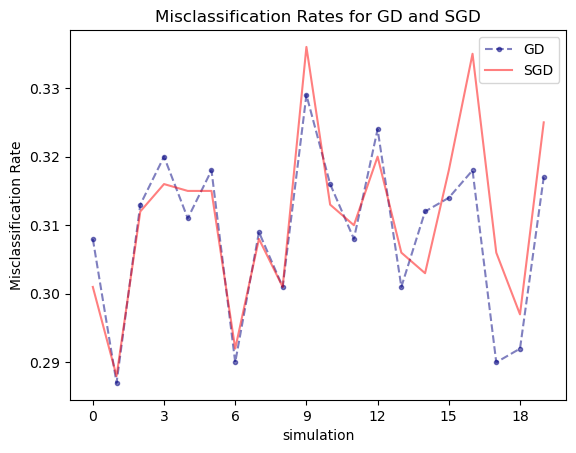

In [110]:
from matplotlib.ticker import MaxNLocator

nb_simu_test = 20
misc_gd_ls = []
misc_sgd_ls = []

for i in range(nb_simu_test):
    X_test_simu, Y_test_simu = generate_data(seed=i, n=N_test, p=p_test)
    Z_test_simu = np.hstack((np.ones((N_test, 1)), X_test_simu))

    predict_gd = predict(Z_test_simu, Y_test_simu, beta_gd)
    predict_sgd = predict(Z_test_simu, Y_test_simu, beta_sgd)
    
    misc_gd_ls.append(predict_gd["misc_rate"])
    misc_sgd_ls.append(predict_sgd["misc_rate"])

fig, ax = plt.subplots()
ax.plot(misc_gd_ls, "o--", color="navy", alpha=0.5, markersize=3, label="GD")
ax.plot(misc_sgd_ls, "-", color="r", alpha=0.5, label="SGD")

ax.set_title("Misclassification Rates for GD and SGD")
ax.set_xlabel("simulation")
ax.set_ylabel("Misclassification Rate")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

We can see that during our simulation, the misclassification rates are mostly fall into range of 25% to 35%. This outcome is expected since we know our true logit function has a degree of 2, while we have chosen our model to have a degree of 1.

## Exercise 6

Now we consider more complexed model, with degree 2 - which is closer to our true function: 

$$
q_{\beta, \gamma}(x) = \frac{\exp(\beta_0 + \beta^T x + \gamma^T x^2)}{1 + \exp(\beta_0 + \beta^T x + \gamma^T x^2)}
$$

where $x \in \mathbb{R}^p \to x^2 \in \mathbb{R}^p$ is applied component-wise. We notice that: 

- Now for each iteration of GD and SGD, two vectors need to be updated: $\beta \in \mathbb{R}^{p+1}$ (include the intercept) and $\gamma \in \mathbb{R}^p$

- $\beta$ and $\gamma$ are independent coefficient terms appli linearly to the input vector. 

- The derivative with respect to $\beta$ will be the same as before. 

- The derivative with respect to $\gamma$ will have similar mathematic formula, execept that we will use $x^2$ instead of $x$ and we will not include the constant for intercept. 

- We need to update all other functions ton include the quadratic term. 

**Python implementation**

In [102]:
def sgd_quad(X, Y, beta, batch_size=10, iters=10):
    """
    Stochastic Gradient Descent algorithm
    With Quadratic term
    Returns:
    beta: array(p+1, 1) - logistic regression minimizer estimator for x (degree 1)
    gamma: array(p, 1) - logictic regression minimizer estimator for x^2 (degree 2)
    hist: a dict object that stores values at each step
    """
    
    N, p = X.shape  # Size of sample X

    # Add column=1 to X for intercept
    ones_column = np.ones((N, 1))
    X2 = X ** 2
    Z = np.hstack((ones_column, X, X2))
    # ZY = np.c_[Z, Y.reshape(N, 1)]

    # Initialize dict to store parameters
    hist = {}
    hist["beta"] = [beta[:p+2].copy()]  # list to store beta value at each iteration
    hist["gamma"] = [beta[p+2:].copy()]  # list to store beta value at each iteration
    hist["risk"] = [risk_beta(Z, Y, beta)]  # list to store risk value
    hist["gradient"] = []

    # Main loops
    for iter in range(iters):

        # Shuffle data at the start of each iteration
        # take a random batch of size batch_size
        indices = np.random.choice(N, size=batch_size)
        Z_batch = Z[indices]
        Y_batch = Y[indices]

        # calculate sigmoid fuction at current beta value
        Yhat = sigmoid(Z_batch, beta)

        # learning rate
        lr = 1 / (iter + 1)

        # calculate gradient at current value
        dbeta = gradient(Z_batch, Y_batch, Yhat)

        # Update value of beta
        beta = beta - lr * dbeta

        # calculate risk at current beta value
        risk = risk_beta(Z, Y, beta)

        # Store values  of current iteration
        hist["beta"].append(beta[:p+2].copy())
        hist["gamma"].append(beta[p+2:].copy())
        hist["risk"].append(risk.copy())
        hist["gradient"].append(dbeta)

    # Results
    return beta, hist


# We will use the same X_train, Y_train, X_test, Y_test dataset as before. 
# Run sgd_quad with the same number of iteration as the previous sgd
beta_init = np.zeros(X_train.shape[1] * 2 + 1)
beta_gamma_sgd_quad, hist_sgd_quad = sgd_quad(X=X_train, Y=Y_train, beta=beta_init, batch_size=batch_size, iters=int(iter_sgd))


In [105]:
# Print results
print('==== Stochastic Gradient Descent (Quadratic model) ====')
print(f"Number of iterations: {iter_sgd:_.0f}")
print_beta(beta_gamma_sgd_quad)

==== Stochastic Gradient Descent (Quadratic model) ====
Number of iterations: 10_000
---Final optimized beta--- 

Intercept         0.014116
Coefficient:
beta_1            0.799122 [x1]
beta_2           -0.000979 [x2]
beta_3            0.001042 [x3]
beta_4            0.029275 [x4]
beta_5           -0.051162 [x5]
beta_6            0.089391 [x6]
beta_7           -0.002662 [x7]
beta_8            0.051208 [x8]
gamma_1          -0.046425 [x1^2]
gamma_2           0.649892 [x2^2]
gamma_3           0.107465 [x3^2]
gamma_4           0.017662 [x4^2]
gamma_5          -0.019899 [x5^2]
gamma_6           0.053786 [x6^2]
gamma_7           0.031564 [x7^2]
gamma_8          -0.007530 [x8^2]


We can clearly see the improvement of SGD when considering more complexed model:

- SGD has correctly reduce the coefficeint of the intercept to a near-zero value. Previously, the SGD result for model 1 has set intercept equal 0.617282 - as large as `beta_1`. 

- The two largest coefficients are `beta_1` (corresponding to $x_1$) and `gamma_2` (corresponding to $x_2^2$). We know that our true logit function for $q_{x}$ is: 

$$p(x) = \frac{\exp(x_1 + x_2^2 )}{1 + \exp(x1 + x_2^2 )}$$

So, with the same number of iterations (which means same number of evaluation), SGD for model 2 has correctly chosen the important features in our dataset.

We now test SGD for model 2 with the same test data `X_test`, `Y_test` and measure its performance using misclassification metric: 

In [111]:
# Transform data to include 1 column and quadratic term
X_test_squared = X_test ** 2
Z_test_poly = np.hstack((np.ones((N_test, 1)), X_test, X_test_squared))

# Predict test data using previous trained model
predict_sgd_quad = predict(Z_test_poly, Y_test, beta_gamma_sgd_quad)

# Print the result
print('==== Stochastic Gradient Descent (Model 1) Test Result====')
print(f"Misclassification rate: {predict_sgd["misc_rate"]:.2%}")
print()
print('==== Stochastic Gradient Descent (Model 2) Test Result====')
print("with quadratic term")
print(f"Misclassification rate: {predict_sgd_quad["misc_rate"]:.2%}")
print()


==== Stochastic Gradient Descent (Model 1) Test Result====
Misclassification rate: 32.50%

==== Stochastic Gradient Descent (Model 2) Test Result====
with quadratic term
Misclassification rate: 30.40%



With our test data, we see that even though Model 2 performs better than Model 1, our accuracy does not increase significantly. We will try to run simulation several time with difference test data: 

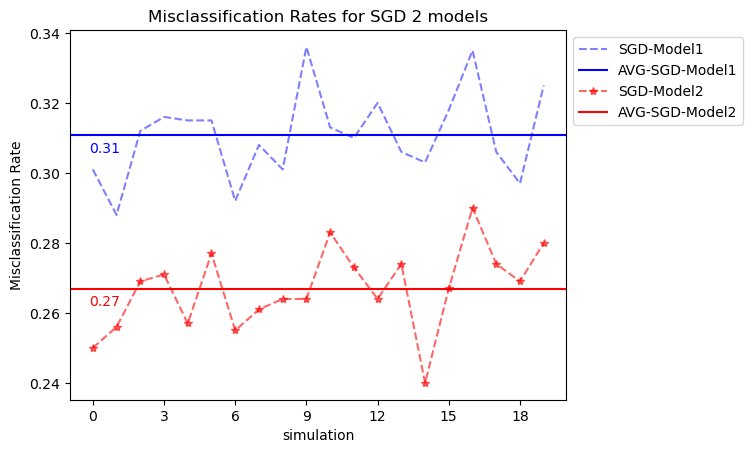

In [135]:
from matplotlib.ticker import MaxNLocator

nb_simu_test = 20
misc_sgd_model1 = []
misc_sgd_model2 = []

for i in range(nb_simu_test):
    X_test_simu, Y_test_simu = generate_data(seed=i, n=N_test, p=p_test)
    X_test_simu_squared = X_test_simu ** 2
    Z_test_simu = np.hstack((np.ones((N_test, 1)), X_test_simu))
    Z_test_poly_simu = np.hstack((np.ones((N_test, 1)), X_test_simu, X_test_simu_squared))

    predict_sgd_model1 = predict(Z_test_simu, Y_test_simu, beta_sgd)
    predict_sgd_model2 = predict(Z_test_poly_simu, Y_test_simu, beta_gamma_sgd_quad)
    
    misc_sgd_model1.append(predict_sgd_model1["misc_rate"])
    misc_sgd_model2.append(predict_sgd_model2["misc_rate"])

    avg_misc_model1 = np.mean(misc_sgd_model1)
    avg_misc_model2 = np.mean(misc_sgd_model2)

fig, ax = plt.subplots()
# Plot result for Model1
ax.plot(misc_sgd_model1, "--", color="blue", alpha=0.5, label="SGD-Model1")
ax.axhline(avg_misc_model1, linestyle="-", color="blue", alpha=1, label="AVG-SGD-Model1")
ax.text(0.5, avg_misc_model1 - 0.005, f"{avg_misc_model1:.2f}", ha='center', color='blue', fontsize=10)
# Plot result for Model2
ax.plot(misc_sgd_model2, "*--", color="r", alpha=0.6, label="SGD-Model2")
ax.axhline(avg_misc_model2, linestyle="-", color="r", alpha=1, label="AVG-SGD-Model2")
ax.text(0.5, avg_misc_model2 - 0.005, f"{avg_misc_model2:.2f}", ha='center', color='r', fontsize=10)

ax.set_title("Misclassification Rates for SGD 2 models")
ax.set_xlabel("simulation")
ax.set_ylabel("Misclassification Rate")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.show()

From our simulation, we observed that Model 2 always outperforms Model 1. On average, Model 2 achieves a 27% misclassification rate, while Model 1 has an average misclassification rate of around 31%.

## Exercise 7

Now we will use logistic Lasso from the `scikit-learn` package to train Model1 and Model2. 

**Data generation**

1. Previously, we generated train data set and test data set seperately. With `scikit-learn`, to follow general convention, we will create new data set and use `train_test_split` function. Our new dataset will have 5000 observations, with 80% will be used for training and 20% for testing. 

2. Our current 2 models are: 

- Model 1: only include linear term of features

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8
\end{bmatrix}
$$

- Model 2: we add quadratic term of features to Model 1

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8 & x_1^2 & x_2^2 & ... & x_8^2
\end{bmatrix}
$$

- Additionally, `sklearn` has a `PolynomialFeatures` that generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the given degree [(sklearn poly-feature)](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). We will create our Model 3 wih this also for comparison. 

In our example, our model will be: 

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8 & x_1^2 & x_1 x_2 & x_2^2 & ... & x_7 x_8 & x_8^2
\end{bmatrix}
$$

In [132]:
# Generate and preprocessing data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, Y = generate_data(seed=100, n=5000, p=8)

# Model 1 Data: 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Model 2 Data: 
X_train_2, X_test_2 = np.hstack((X_train, X_train ** 2)), np.hstack((X_test, X_test ** 2))

# Model 3 Data: 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_3, X_test_3 = poly.fit_transform(X_train), poly.fit_transform(X_test)

# Final dataset
X_trains = (X_train, X_train_2, X_train_3)
X_tests = (X_test, X_test_2, X_test_3)

for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    print(f"Model {i}")
    print(f"X_train shape: {X_train_.shape}")
    print(f"X_test shape: {X_test_.shape}")

Model 1
X_train shape: (4000, 8)
X_test shape: (1000, 8)
Model 2
X_train shape: (4000, 16)
X_test shape: (1000, 16)
Model 3
X_train shape: (4000, 44)
X_test shape: (1000, 44)


**Train models using Logistic LASSO**

`scikit-learn` provides `LogisticRegressionCV` class that perform logistic regression with built-in cross-validation to optimize parameter $\lambda$.

The value for $\lambda$ is set by parameter `Cs` and can be accessed by model attribute `C_`. Each of the values in `Cs` describes the inverse of regularization strength. If `Cs` is as an int, then a grid of Cs values are chosen in a logarithmic scale between $10^{-4}$ and $10^{4}$. Note that since this is the inverse of $\lambda$, smaller values of `C_` means larger value for $\lambda$, which specifies stronger regularization.

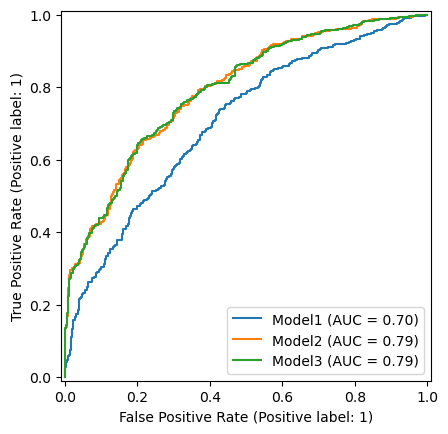

In [288]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay


models = []

fig, ax = plt.subplots()

# Use LogisticRegressionCV
for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    model = LogisticRegressionCV(
        Cs=10, cv=10, max_iter=1000, random_state=123, penalty="l1", solver="liblinear", scoring='accuracy'
    ).fit(X_train_, Y_train)
    models.append(model)
    RocCurveDisplay.from_estimator(model, X_test_, Y_test, ax=ax, name=f"Model{i}")

plt.show()

In [287]:
print("Optimized value for regularization parameter")
print("LogisticRegressionCV")
print("==============")
for i, model in enumerate(models, start=1): 
    print(f"Model {i}: {model.C_}")

Optimized value for regularization parameter
LogisticRegressionCV
Model 1: [0.04641589]
Model 2: [0.04641589]
Model 3: [0.00599484]


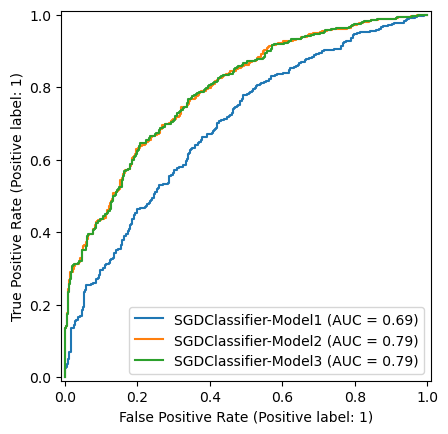

In [280]:
# Use SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# define parameter grid to fine tune alpha value
# use 10 values from 1e-4 to 1e4
param_grid = {"alpha": np.logspace(-4, 4, 10)}

# SGD Classifier
sgd_clf = SGDClassifier(
    loss="log_loss",
    penalty="l1",
    random_state=100,
    max_iter=1000,
    learning_rate="optimal",
)


models_sgd = []

fig, ax = plt.subplots()

# Using GridsearchCV for 3 models
for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    model = GridSearchCV(sgd_clf, param_grid, cv=10, scoring="accuracy").fit(
        X_train_, Y_train
    )
    models_sgd.append(model)
    RocCurveDisplay.from_estimator(
        model.best_estimator_, X_test_, Y_test, ax=ax, name=f"SGDClassifier-Model{i}"
    )

In [282]:
print("Optimized value for regularization parameter")
print("SGDClassifier")
print("==============")

for i, model in enumerate(models_sgd, start=1):
    print(f"Model {i}: {model.best_params_['alpha']:.5f}")

Optimized value for regularization parameter
SGDClassifier
Model 1: 0.00077
Model 2: 0.00599
Model 3: 0.00599


## Exercise 8

In [307]:
import pandas as pd


# Load data
url = "https://www.dropbox.com/scl/fi/9uz7mu64ew91go651qn11/spam.csv?rlkey=rp07p7kmt27gox1c3sckeehdo&e=1&st=yky8ql7n&dl=1"
data = pd.read_csv(url, encoding='ISO-8859-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [308]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [316]:
# Only keep the first 2 columns
data = data.iloc[:, :2]
data = data.rename(columns={'v1': 'label', 'v2':'text'})
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Remark fromm profesor

### Question 3:

We have nonlinearity which differs from standard logistic. 
Loop n = 3000 with each x is a Gaussian N(o, I)
x_i in R^8
x_i are independent of each other because of the Identity matrix. 
We can also use for loop. 

### Question 4: 

- We will have large bias because of the nonlinearity. Maybe include a computation and graph of variane of the predictors. 
- Remarks: there is an intercept. number of parameter is p = 8 + 1 = 9.
- Give the formula to GD (explainations, math derivatives, well written, update rule)
- Define Z as: 1 column + X. 
- In order to get GD, we need: 
    - Gradient. We will divided by n to have something more like a gradient. 
    - Learning rate: 1/K with K is the number of iterations.
    - Initialize value of beta. Choose random value from standard gaussian or 0. 
    - Update rule. beta^k+1 = beta^k - gamma_k+1 * gradient with k > 0.
- SGD:
    - the point in exam is to consider general problems where the computing time is measured with respected to gradient evaluation. 
    specially number of time sigmoid(beta_i) is evaluated. 
    - We dont want to focus on logistic regression where some benefit are observed easily using vectorize operation.
    We can show which method decrease the Risk faster. 
    - Implementation: fix the number of iterations: K = 100 for GD. 
    For each stage: we need n evaluation of q_beta. 
    Do it K time. 
    cardinality of q_beta = 300_000. 
    - Choose minibatch size = m = 30. (include mini_batch size in SGD function)
    - We need 30 evaluation at each SGD iterations. 
    R_m^{SGD} = 1/m \sum (Y_i - q_beta(X_i)) * Z_i with Z_i = column(1 X_i)
    - So in the end, after \tilt{K} we have: \tilt{K}*m = Kn.
    We need \tilt{K} = Kn/m = 10_000.
    We dont need to be precise at the beginning of our iterations. The advantage of SGD over GD. 
    We dont need to use epoch in our code. 

### Question 5: 
- Just look at misclassification rate: propotion of wrong prediction. 

\hat{R_n}(given beta) = 1/n \sum(Indicator{Y_i <> h_beta(X_i)})

with h_beta(X) = 1 if q_beta(X) >= 1/2
= 0 if q_Beta(X) < 1/2. 

Or we can use Bernoulli(q_beta(X))

- Generate new sample for evaluation. (n=1000 sample size)
- For real data, we need to use test train spit for cross validation. 



